In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
np.random.seed(0)

In [4]:
train1 = pd.read_csv("Train_Dataset1.csv")
X_train1 = train1.iloc[:, [0]].values
Y_train1 = train1.iloc[:, [1]].values
train2 = pd.read_csv("Train_Dataset2.csv")
X_train2 = train2.iloc[:, [0]].values
Y_train2 = train2.iloc[:, [1]].values
test1 = pd.read_csv("Test_Dataset1.csv")
X_test1 = test1.iloc[:, [0]].values
Y_test1 = test1.iloc[:, [1]].values
test2 = pd.read_csv("Test_Dataset2.csv")
X_test2 = test2.iloc[:, [0]].values
Y_test2 = test2.iloc[:, [1]].values

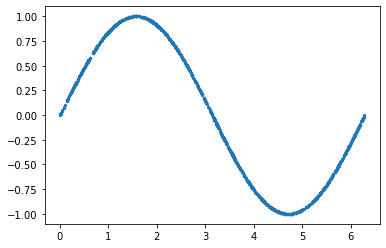

In [5]:
plt.scatter(X_train1,Y_train1,s=[5])
plt.savefig('train_dataset1.png')
plt.show()

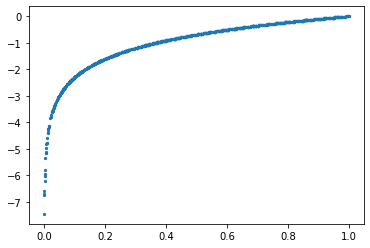

In [6]:
plt.scatter(X_train2,Y_train2,s=[5])
plt.savefig('train_dataset2.png')
plt.show()

In [7]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [8]:
def Dsigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [9]:
class Model:
    def __init__(self,n):
        self.n = n#hidden nodes
        self.w1 = np.random.random((1,n))#weight betweeen input and hidden node
        self.b1 = np.random.random((1,n))#bias of hidden node
        self.w2 = np.random.random((n,1))#weight between hidden and output
        self.b2 = np.random.random((1))#bias of output
    def predict(self,x):
        a = sigmoid(np.dot(x,self.w1)+self.b1)#hidden layer
        return np.dot(a,self.w2)+self.b2#output
    def fit(self,x,y,lr,epochs):
        k = len(x)
        for i in range(epochs):#number of epochs
            for i in range(k):
                e = self.predict(x[i])-y[i]#derivative of squared loss with output
                #updates for our weights and biases
                d = lr*e
                b = sigmoid(np.dot(x[i],self.w1)+self.b1).reshape((self.n,1))
                c = x[i]*self.w2.T*Dsigmoid(np.dot(x[i],self.w1)+self.b1)
                f = self.w2.T*Dsigmoid(np.dot(x[i],self.w1)+self.b1)
                self.b2 = self.b2 - d
                self.b1 = self.b1 - d*f
                self.w2 = self.w2 - d*b
                self.w1 = self.w1 - d*c

In [10]:
model1 = Model(3)#3 hidden layers
model1.fit(X_train1,Y_train1,0.1,100)#0.1 learning rate and 100 epochs

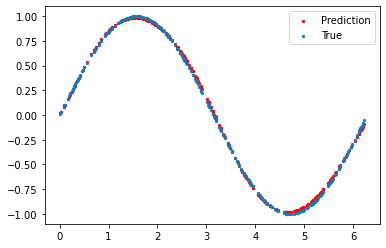

In [11]:
Y_pred1 = model1.predict(X_test1)
plt.scatter(X_test1,Y_pred1,c='red',s=[5])
plt.scatter(X_test1,Y_test1,s=[5])
plt.legend(["Prediction","True"])
plt.savefig('test1_pred.png')
plt.show()

In [12]:
print("training loss for datset1: ",mean_squared_error(Y_train1, model1.predict(X_train1)))
print("test loss for datset1: ",mean_squared_error(Y_test1, Y_pred1))

training loss for datset1:  0.00036922452973166335
test loss for datset1:  0.0003720095627631994


In [13]:
model2 = Model(2)#2 hidden layers
model2.fit(X_train2,Y_train2,0.1,100)#0.1 learning rate and 100 epochs

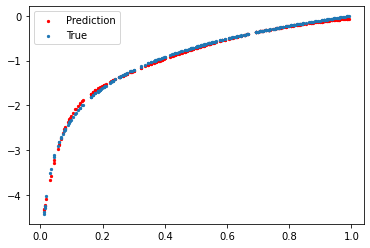

In [14]:
Y_pred2 = model2.predict(X_test2)
plt.scatter(X_test2,Y_pred2,c='red',s=[5])
plt.scatter(X_test2,Y_test2,s=[5])
plt.legend(["Prediction","True"])
plt.savefig('test2_pred.png')
plt.show()

In [15]:
print("training loss for datset2: ",mean_squared_error(Y_train2, model2.predict(X_train2)))
print("test loss for datset2: ",mean_squared_error(Y_test2, Y_pred2))

training loss for datset2:  0.027838631448163703
test loss for datset2:  0.001455140054811707
